----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  1.893872017705638e-22
Q_si (C): -1.2529067149167345e-12
Q_se (C): 1.2529067145949733e-12
Q_di (C): -1.2528845974238692e-12
Q_de (C): 1.2528845979350176e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  248.5 seconds


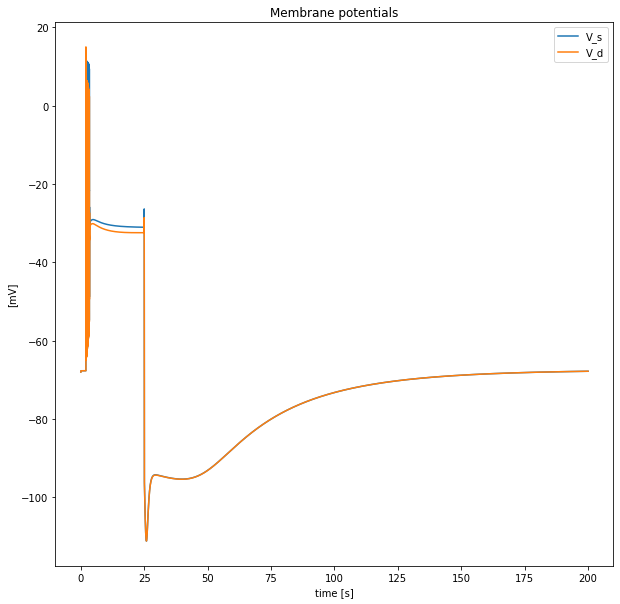

In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
from EDPRmodel5C import *
from solve_EDPRmodel5C import solve_EDPRmodel

%matplotlib inline

start_time = time.time()

t_dur = 200     # [s]
alpha = 2.0
I_stim =  8e-11 # [A]
stim_start = 2 # [s]
stim_end = 25  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='ICS')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  1.1169906910824401e-21
Q_si (C): -1.904271723348156e-12
Q_se (C): 1.9042717243945883e-12
Q_di (C): -1.905569860789899e-12
Q_de (C): 1.905569860860457e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  36.9 seconds


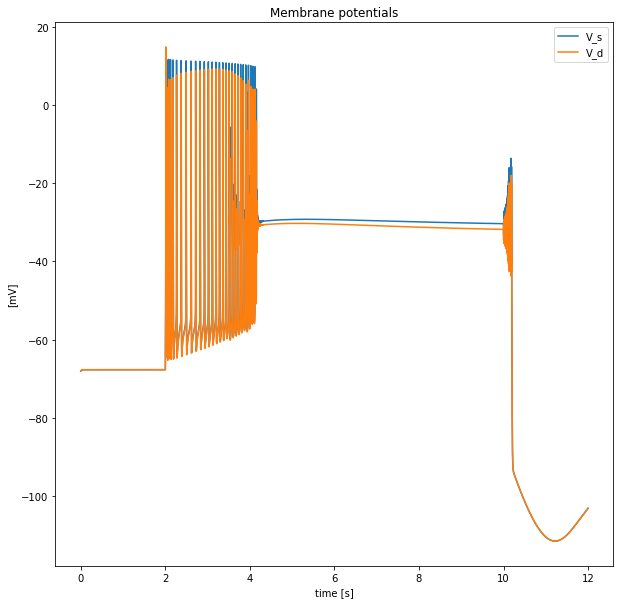

In [27]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='ECS')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  2.8457355673168296e-22
Q_si (C): -1.90558883868339e-12
Q_se (C): 1.9055888386729234e-12
Q_di (C): -1.9068836541860316e-12
Q_de (C): 1.9068836544810718e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  41.2 seconds


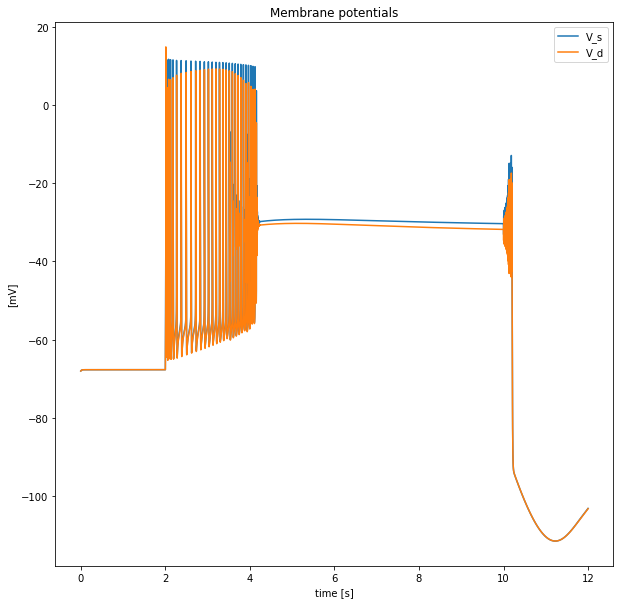

In [28]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='NaCl')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  1.5392506418162053e-23
Q_si (C): -1.93658224568936e-12
Q_se (C): 1.936582246059515e-12
Q_di (C): -1.9374941356700806e-12
Q_de (C): 1.9374941353153183e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  41.6 seconds


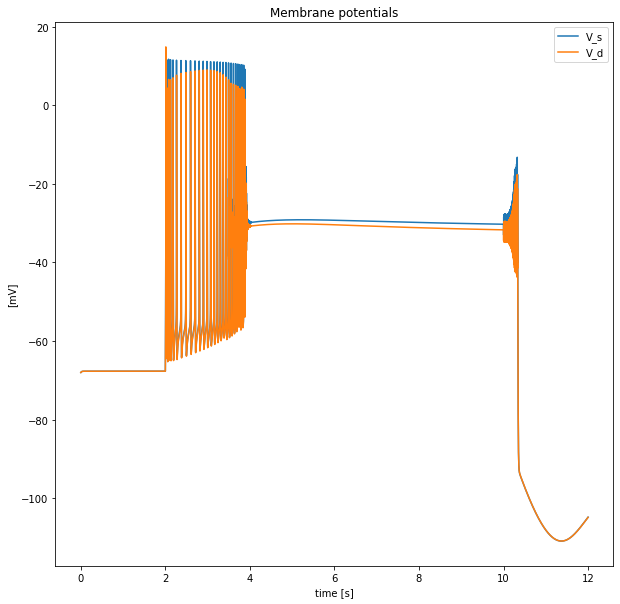

In [29]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='KCl')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  -7.326768431559782e-23
Q_si (C): -1.4317438847910141e-12
Q_se (C): 1.4317438846707076e-12
Q_di (C): -1.4317649821562719e-12
Q_de (C): 1.4317649822033107e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  34.8 seconds


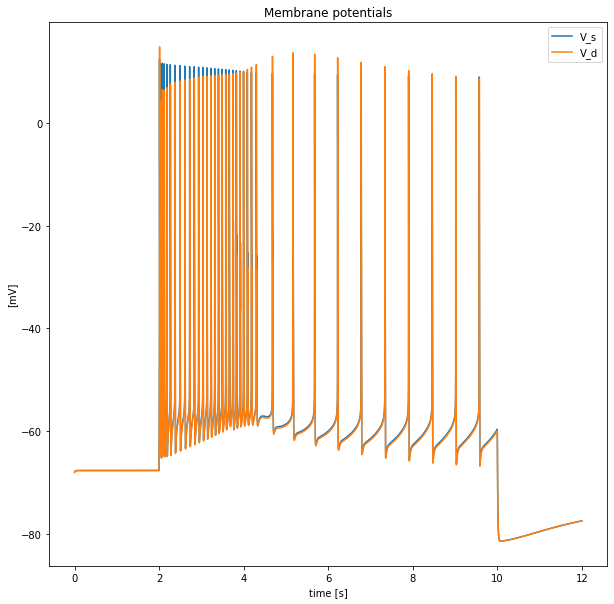

In [30]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='Na')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  -2.7115125882330298e-22
Q_si (C): -1.968839933232803e-12
Q_se (C): 1.96883993281093e-12
Q_di (C): -1.9695508660581646e-12
Q_de (C): 1.9695508662088863e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  46.9 seconds


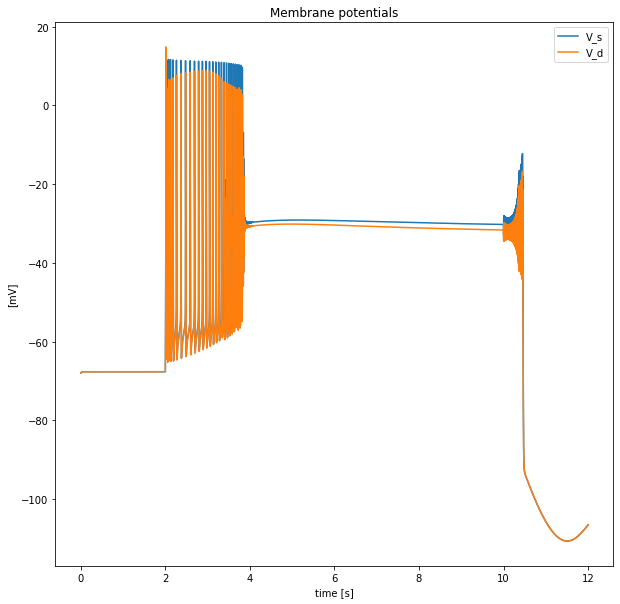

In [31]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='K')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()

----------------------------
Initial values
----------------------------
initial total charge(C):  0.0
Q_si (C): -1.2566400000000272e-12
Q_se (C): 1.2566400000000272e-12
Q_di (C): -1.2566400000000272e-12
Q_de (C): 1.2566400000000272e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
potentials [mV]
phi_ex:  0
phi_si:  -68
phi_se:  0
phi_di:  -68
phi_de:  0
phi_sm:  -68
phi_dm:  -68
E_Na_s:  55.0
E_Na_d:  55.0
E_K_s:  -84.0
E_K_d:  -84.0
E_Cl_s:  -79.0
E_Cl_d:  -79.0
E_Ca_s:  124.0
E_Ca_d:  124.0
----------------------------
Final values
----------------------------
total charge at the end (C):  -1.1491295659369663e-21
Q_si (C): -1.9131686643735427e-12
Q_se (C): 1.9131686629633593e-12
Q_di (C): -1.914229838249888e-12
Q_de (C): 1.914229838510942e-12
Q_ex (C): 1.2566400000000272e-12
----------------------------
elapsed time:  39.5 seconds


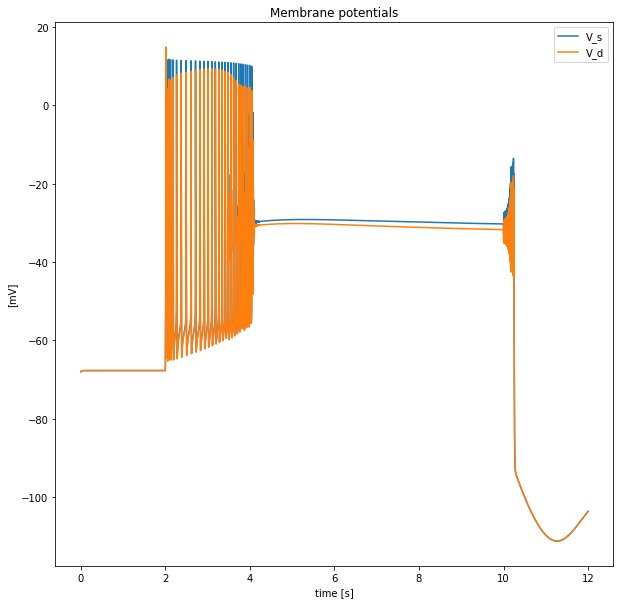

In [32]:
start_time = time.time()

t_dur = 12     # [s]
alpha = 2.0
I_stim =  7.2e-11 # [A]
stim_start = 2 # [s]
stim_end = 10  # [s]

sol = solve_EDPRmodel(t_dur, alpha, I_stim, stim_start, stim_end, protocol='Cl')

Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, \
    Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, n, h, s, c, q, z = sol.y
t = sol.t

my_cell = EDPRmodel(309.14, Na_si, Na_se, Na_di, Na_de, Na_ex, K_si, K_se, K_di, K_de, K_ex, Cl_si, Cl_se, Cl_di, Cl_de, Cl_ex, Ca_si, Ca_se, Ca_di, Ca_de, Ca_ex, X_si, X_se, X_di, X_de, X_ex, alpha, 0, Ca_si[0], Ca_di[0], n, h, s, c, q, z)

phi_si, phi_se, phi_di, phi_de, phi_ex, phi_sm, phi_dm = my_cell.membrane_potentials(I_stim=0)


q_si = my_cell.total_charge([my_cell.Na_si[-1], my_cell.K_si[-1], my_cell.Cl_si[-1], my_cell.Ca_si[-1], my_cell.X_si[-1]], my_cell.V_si)
q_se = my_cell.total_charge([my_cell.Na_se[-1], my_cell.K_se[-1], my_cell.Cl_se[-1], my_cell.Ca_se[-1], my_cell.X_se[-1]], my_cell.V_se)        
q_di = my_cell.total_charge([my_cell.Na_di[-1], my_cell.K_di[-1], my_cell.Cl_di[-1], my_cell.Ca_di[-1], my_cell.X_di[-1]], my_cell.V_di)
q_de = my_cell.total_charge([my_cell.Na_de[-1], my_cell.K_de[-1], my_cell.Cl_de[-1], my_cell.Ca_de[-1], my_cell.X_de[-1]], my_cell.V_de)
q_ex = my_cell.total_charge([my_cell.Na_ex[-1], my_cell.K_ex[-1], my_cell.Cl_ex[-1], my_cell.Ca_ex[-1], my_cell.X_ex[-1]], my_cell.V_ex)
print("Final values")
print("----------------------------")
print("total charge at the end (C): ", q_si + q_se + q_di + q_de)
print("Q_si (C):", q_si)
print("Q_se (C):", q_se)
print("Q_di (C):", q_di)
print("Q_de (C):", q_de)
print("Q_ex (C):", q_ex)
print("----------------------------")
print('elapsed time: ', round(time.time() - start_time, 1), 'seconds')


plt.figure(figsize=(10,10))
plt.plot(t, phi_sm*1000, '-', label='V_s')
plt.plot(t, phi_dm*1000, '-', label='V_d')
plt.title('Membrane potentials')
plt.xlabel('time [s]')
plt.ylabel('[mV]')
plt.legend(loc='upper right')

plt.show()